In [1]:
import pandas as pd
import os
os.chdir('../')
from python_code import gp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
font = {'size' : 14}
matplotlib.rc('font', **font)

In [2]:
df = pd.read_csv('../data/weather.csv')
df

,pressure,temperature,lon,lat
0,200.484375,0.605377,-131.000000,46.000000
1,384.851562,-0.022339,-124.400002,41.900002
2,156.898438,-0.266449,-124.500000,46.099998
3,248.429688,-1.306702,-124.699997,47.299999
4,253.226562,0.143982,-124.500000,44.599998
...,...,...,...,...
152,281.664062,-1.261230,-124.739998,48.389999
153,76.828125,-1.217896,-122.309898,47.653500
154,642.265625,-2.055450,-128.899994,42.200001
155,464.757812,-3.967743,-129.500000,42.400002


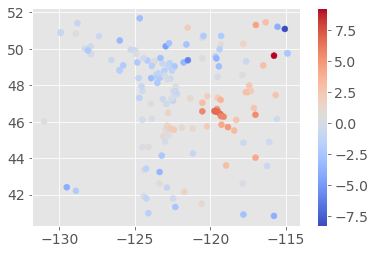

In [3]:
plt.scatter(df['lon'], df['lat'], c=df['temperature'], cmap='coolwarm')
plt.colorbar()

In [4]:
X = np.stack([df['lon'], df['lat']]).T
y = df['temperature'].to_numpy()

In [5]:
Gp = gp.GaussianProcess(X, y)

In [6]:
lon_pred = np.linspace(df['lon'].min(), df['lon'].max(), 100)
lat_pred = np.linspace(df['lat'].min(), df['lat'].max(), 100)
lonlon, latlat = np.meshgrid(lon_pred, lat_pred)
X_pred = np.stack([lonlon.flatten(), latlat.flatten()]).T

In [7]:
Gp.fit()

In [8]:
y_pred = Gp.predict(X_pred)[0]

In [9]:
_, _, var = Gp._calculate_GP_parameters(X_pred)

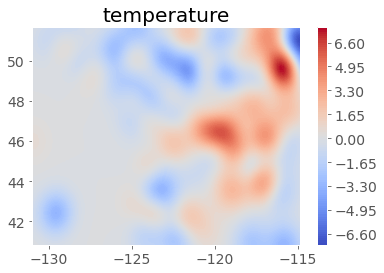

In [10]:
plt.contourf(lon_pred, lat_pred, y_pred.reshape(100,100), 100, cmap='coolwarm')
plt.colorbar()
plt.title('temperature');

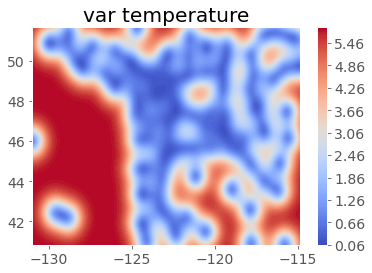

In [11]:
plt.contourf(lon_pred, lat_pred, np.diag(var).reshape(100,100), 100, cmap='coolwarm')
plt.colorbar()
plt.title('var temperature');

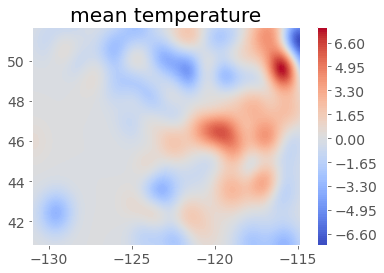

In [12]:
plt.contourf(lon_pred, lat_pred, y_pred.reshape(100,100), 100, cmap='coolwarm')
plt.colorbar()
plt.title('mean temperature');

In [13]:
y = df['pressure'].to_numpy()

In [14]:
Gp = gp.GaussianProcess(X, y)
Gp.fit()
y_pred = Gp.predict(X_pred)[0]

In [15]:
_, _, var = Gp._calculate_GP_parameters(X_pred)

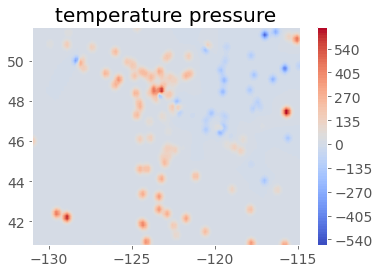

In [16]:
plt.contourf(lon_pred, lat_pred, y_pred.reshape(100,100), 100, cmap='coolwarm')
plt.colorbar()
plt.title('temperature pressure');

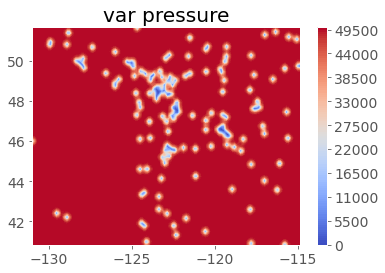

In [17]:
plt.contourf(lon_pred, lat_pred, np.diag(var).reshape(100,100), 100, cmap='coolwarm')
plt.colorbar()
plt.title('var pressure');